In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_size = [224, 224]
batch_size = 50

In [ ]:
#Creating model and freezing all layers except the last two

vgg = VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

for layer in vgg.layers[0:-2]:
  layer.trainable = False

In [ ]:
#Creating model and printing model summary

folders = glob('/content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2/*')
  
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#Creating training and test sets and rescaling images

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2',
                                                 seed = 42,
                                                 target_size = image_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2',
                                            seed = 42,
                                            target_size = image_size,
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 12948 images belonging to 157 classes.
Found 3237 images belonging to 157 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
259/259 [==============================] - 277s 1s/step - loss: 4.1665 - accuracy: 0.1145 - val_loss: 3.2417 - val_accuracy: 0.2308
Epoch 2/10
259/259 [==============================] - 274s 1s/step - loss: 2.6199 - accuracy: 0.3499 - val_loss: 2.5945 - val_accuracy: 0.3630
Epoch 3/10
259/259 [==============================] - 273s 1s/step - loss: 1.9464 - accuracy: 0.4907 - val_loss: 2.3417 - val_accuracy: 0.4167
Epoch 4/10
259/259 [==============================] - 273s 1s/step - loss: 1.5409 - accuracy: 0.5912 - val_loss: 2.3619 - val_accuracy: 0.4368
Epoch 5/10
259/259 [==============================] - 268s 1s/step - loss: 1.2560 - accuracy: 0.6601 - val_loss: 2.2634 - val_accuracy: 0.4603
Epoch 6/10
259/259 [==============================] - 273s 1s/step - loss: 1.1002 - accuracy: 0.6956 - val_loss: 2.3309 - val_accuracy: 0.4730
Epoch 7/10
259/259 [==============================] - 274s 1s/step

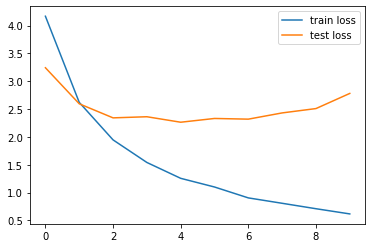

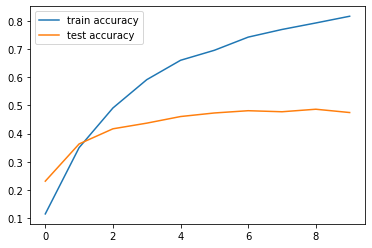

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss for r
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies for r
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#Save model

import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/vgg16_model_jenny')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/vgg16_model_jenny/assets
